# Performing PCA on kidney dataset columns

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper


matplotlib.style.use('ggplot')

In [7]:
scaleFeatures = False


df = pd.read_csv('kidney_disease.csv')
df.dropna(axis = 0, how = 'any', inplace = True)
print(df.head())


labels = ['red' if i=='ckd' else 'green' for i in df.classification]


df = df[['bgr', 'wc', 'rc']]


df.head(10)
 	

    id   age    bp     sg   al   su       rbc        pc         pcc  \
3    3  48.0  70.0  1.005  4.0  0.0    normal  abnormal     present   
9    9  53.0  90.0  1.020  2.0  0.0  abnormal  abnormal     present   
11  11  63.0  70.0  1.010  3.0  0.0  abnormal  abnormal     present   
14  14  68.0  80.0  1.010  3.0  2.0    normal  abnormal     present   
20  20  61.0  80.0  1.015  2.0  0.0  abnormal  abnormal  notpresent   

            ba      ...        pcv     wc   rc  htn   dm  cad appet   pe  ane  \
3   notpresent      ...         32   6700  3.9  yes   no   no  poor  yes  yes   
9   notpresent      ...         29  12100  3.7  yes  yes   no  poor   no  yes   
11  notpresent      ...         32   4500  3.8  yes  yes   no  poor  yes   no   
14     present      ...         16  11000  2.6  yes  yes  yes  poor  yes   no   
20  notpresent      ...         24   9200  3.2  yes  yes  yes  poor  yes  yes   

   classification  
3             ckd  
9             ckd  
11            ckd  
14    

,bgr,wc,rc
3,117.0,6700,3.9
9,70.0,12100,3.7
11,380.0,4500,3.8
14,157.0,11000,2.6
20,173.0,9200,3.2
22,95.0,6900,3.4
27,264.0,9600,4.1
48,70.0,18900,3.5
58,253.0,7200,4.3
71,163.0,14600,3.2


In [8]:
df.dtypes

bgr    float64
wc      object
rc      object
dtype: object

In [9]:
df.bgr = pd.to_numeric(df.bgr)
df.wc = pd.to_numeric(df.wc)
df.rc = pd.to_numeric(df.rc)
print(df)
df.dtypes

       bgr     wc   rc
3    117.0   6700  3.9
9     70.0  12100  3.7
11   380.0   4500  3.8
14   157.0  11000  2.6
20   173.0   9200  3.2
22    95.0   6900  3.4
27   264.0   9600  4.1
48    70.0  18900  3.5
58   253.0   7200  4.3
71   163.0  14600  3.2
74   129.0   6400  3.4
76   133.0   6200  4.0
84    76.0   3800  2.1
90   280.0   9800  4.2
91   210.0  12500  5.6
92   219.0   5600  3.6
93   295.0   7000  3.2
127  118.0  15200  4.3
128  224.0   5000  2.9
130  128.0  16300  2.7
133  118.0   8400  8.0
144  105.0  10500  4.1
147  288.0  15200  3.0
153  273.0  14600  2.9
157  122.0   7900  3.9
159  303.0  10900  4.3
171  102.0  12800  3.1
176  107.0  12400  3.9
181  117.0  19100  3.7
189  239.0   7500  3.4
..     ...    ...  ...
368   82.0   9400  5.9
369  107.0  10300  4.8
370   83.0   9300  5.4
371   79.0   6500  5.0
372  109.0  10500  5.5
373  133.0   9200  4.9
374  111.0   8000  6.4
375   74.0   9700  5.6
376   88.0   9100  5.2
377   97.0   6400  4.8
379   78.0   5400  5.7
380  113.0 

bgr    float64
wc       int64
rc     float64
dtype: object

In [17]:
import seaborn as sns

In [10]:
print(df.var())
print("This is the describe output: ", df.describe())


bgr    4.217182e+03
wc     9.777380e+06
rc     1.039104e+00
dtype: float64
This is the describe output:                bgr            wc          rc
count  158.000000    158.000000  158.000000
mean   131.341772   8475.949367    4.891772
std     64.939832   3126.880181    1.019364
min     70.000000   3800.000000    2.100000
25%     97.000000   6525.000000    4.500000
50%    115.500000   7800.000000    4.950000
75%    131.750000   9775.000000    5.600000
max    490.000000  26400.000000    8.000000


# Plotting Transformed Dataset

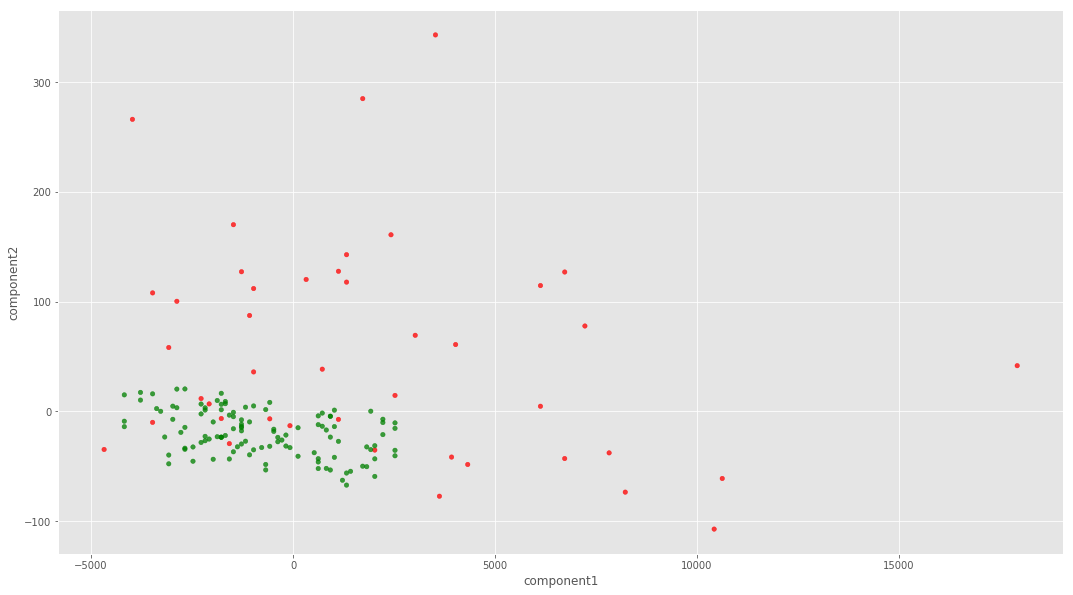

In [24]:
if scaleFeatures: df = helper.scaleFeatures(df)


from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df)
T = pca.transform(df)

plt.figure(1, figsize=(18,10))
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()


# Scatter plot of PCA performed dataset

# As you can see Not chronic kidney diseases in green are easily separable from chronic kidney disease.
## Some results are mixed